# Задание 1



```
Дан массив данных
x = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.
```



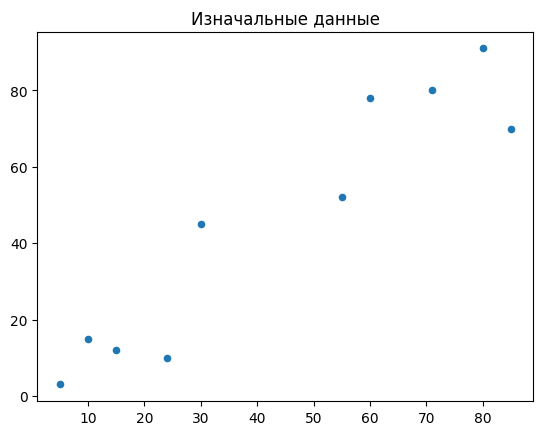

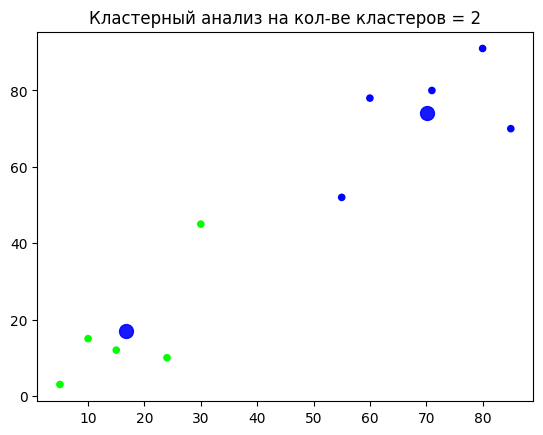

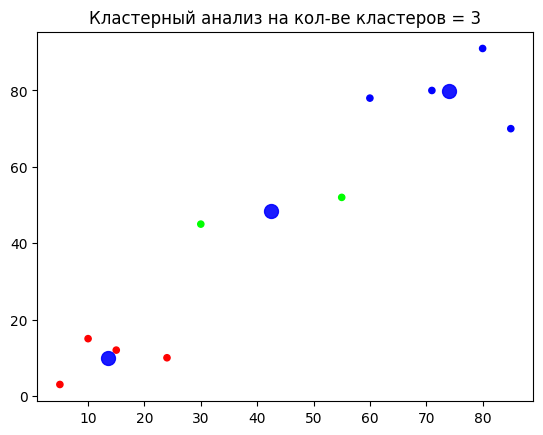

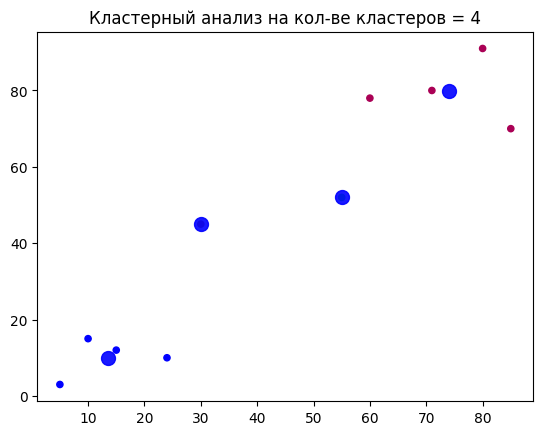

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

x = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
plt.scatter(x[:, 0], x[:, 1], s = 20)
plt.title('Изначальные данные')
plt.show()

print("\n")

for clusters in range(2, 5):
    kmeans = KMeans(n_clusters = clusters, random_state = 0)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    centers = kmeans.cluster_centers_
    plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s = 20, cmap='brg')
    plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
    plt.title(f'Кластерный анализ на кол-ве кластеров = {clusters}')
    plt.show()
    print()


# Задание 2



```
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров
```



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

iris = load_iris()

x=pd.DataFrame(iris.data)
x.columns=iris.feature_names
y=pd.DataFrame(iris.target)
y.columns = ['Targets']

print(x.shape)
x.head(5)



(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


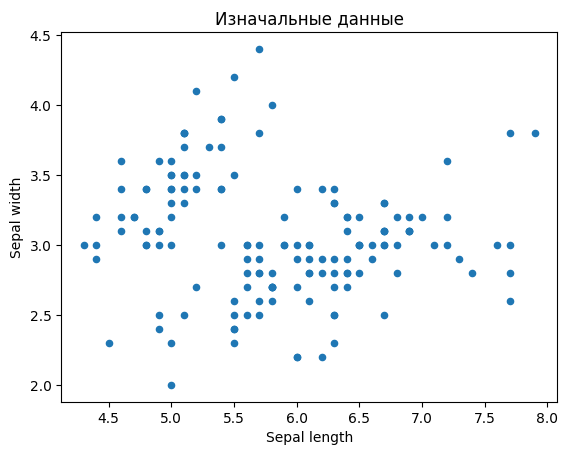

In [58]:
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], s = 20)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Изначальные данные')
plt.show()



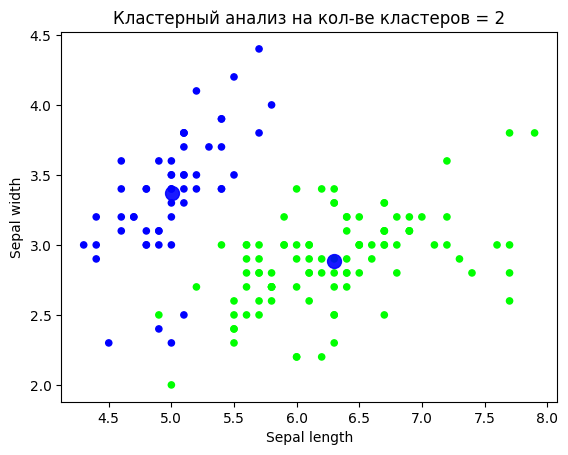

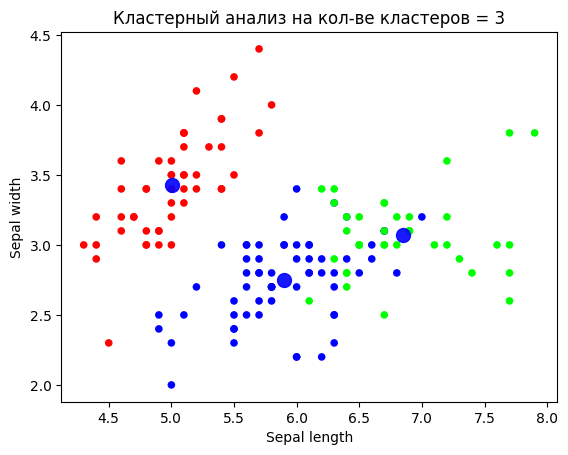

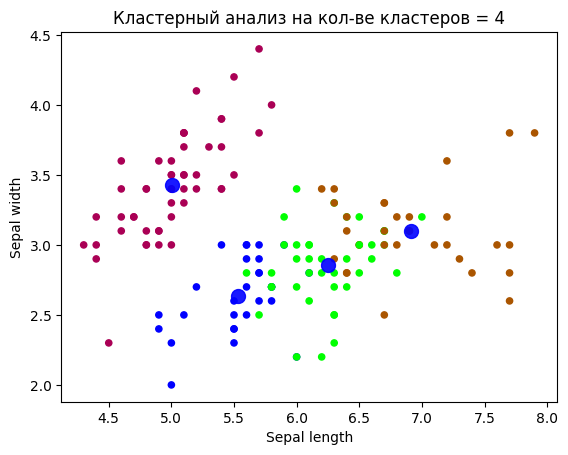

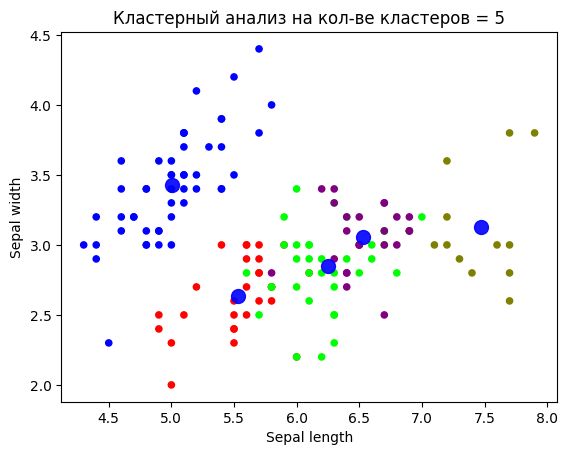

In [67]:
for clusters in range(2, 6):
    kmeans = KMeans(n_clusters = clusters, random_state = 0)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    centers = kmeans.cluster_centers_
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = y_kmeans, s = 20, cmap='brg')
    plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
    plt.title(f'Кластерный анализ на кол-ве кластеров = {clusters}')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
    print()

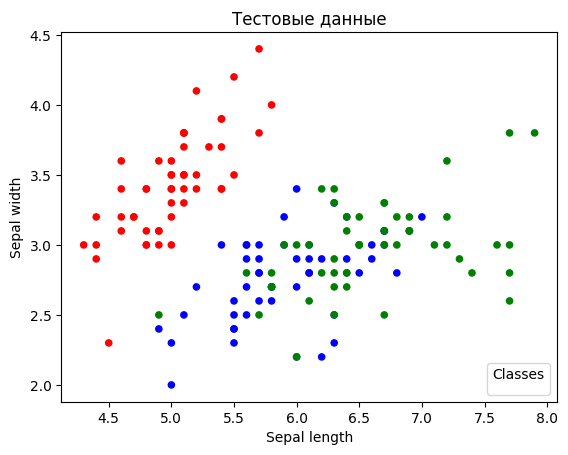

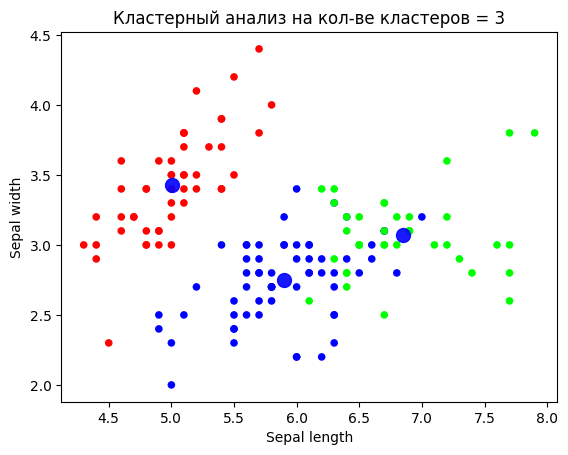

In [71]:
cmap=np.array(['r','b','g'])

plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], s = 20, c=cmap[y['Targets']])

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Тестовые данные')
plt.show()

print()


kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centers = kmeans.cluster_centers_
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = y_kmeans, s = 20, cmap='brg')
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
plt.title(f'Кластерный анализ на кол-ве кластеров = 3')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


# Задание 3



```
Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).
```



In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

iris = load_iris()

x=pd.DataFrame(iris.data)
x.columns=iris.feature_names
y=pd.DataFrame(iris.target)
y.columns = ['Targets']


print(x.shape)
x.head(5)

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


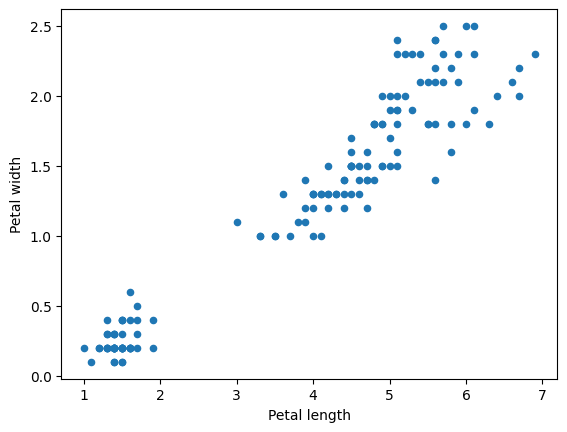

In [79]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], s = 20)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

<Figure size 5040x2160 with 0 Axes>

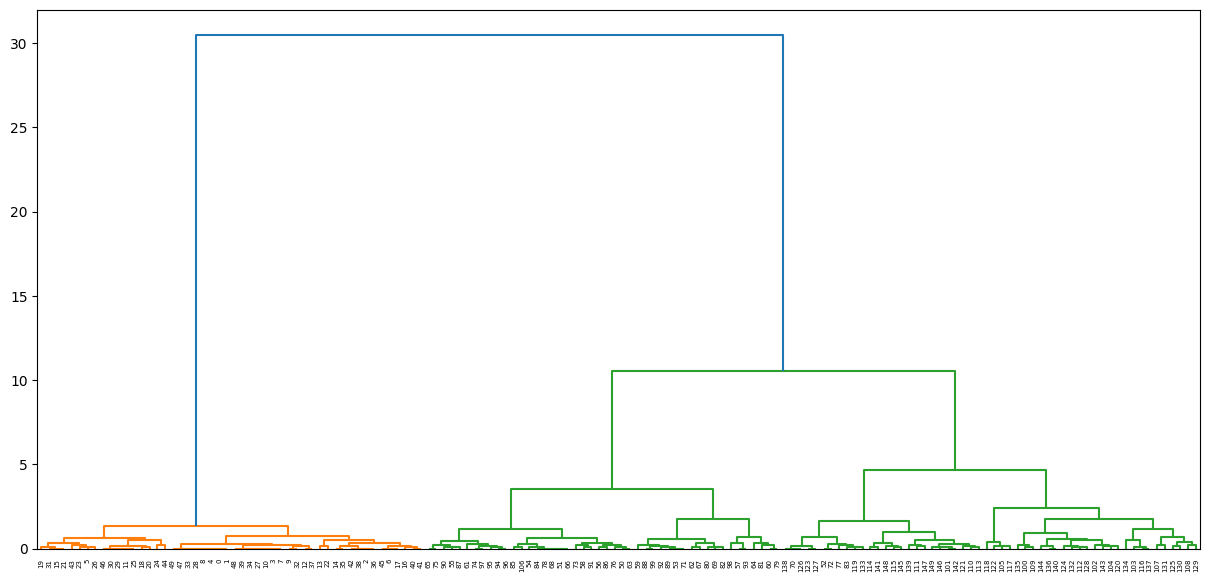

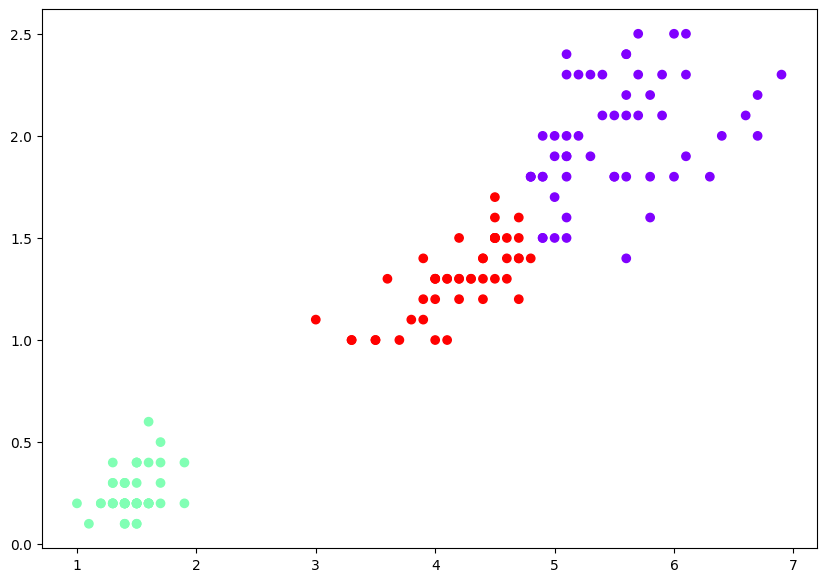

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = x.iloc[:, 2:4].values


plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(15, 7))
dend = dendrogram(linkage(X, method='ward'))
plt.show()


print()

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()